In [1]:
import pandas as pd
import quandl as qd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import os

In [2]:
key = os.environ.get('Quandl_API_Key')

qd.ApiConfig.api_key = key

In [3]:
# "RATEINF/INFLATION_USA" "MULTPL/SP500_PE_RATIO_MONTH" "MULTPL/SP500_EARNINGS_MONTH"

In [4]:
start_date = "1965-01-01"

end_date = "2023-01-31"

inflation_data = qd.get("RATEINF/INFLATION_USA", start_date = start_date, end_date = end_date)

pe_data = qd.get("MULTPL/SP500_PE_RATIO_MONTH", start_date = start_date, end_date = end_date)

In [5]:
df = pd.merge_asof(left=inflation_data, right=pe_data, right_index=True,left_index=True,direction='nearest')
df = df.rename(columns={'Value_x':'Inflation',
                        'Value_y':'S&P500_PE'})
df

,Inflation,S&P500_PE
Date,,
1965-01-31,0.971,18.71
1965-02-28,0.971,18.55
1965-03-31,1.294,18.59
1965-04-30,1.618,18.65
1965-05-31,1.618,17.57
...,...,...
2022-08-31,8.263,19.98
2022-09-30,8.202,18.12
2022-10-31,7.745,20.14


In [6]:
df.describe()

,Inflation,S&P500_PE
count,696.000000,696.000000
mean,3.983807,19.658420
std,2.867817,12.045199
min,-2.097000,6.790000
25%,2.107000,14.115000
50%,3.187500,17.940000
75%,4.979000,22.500000
max,14.756000,123.730000


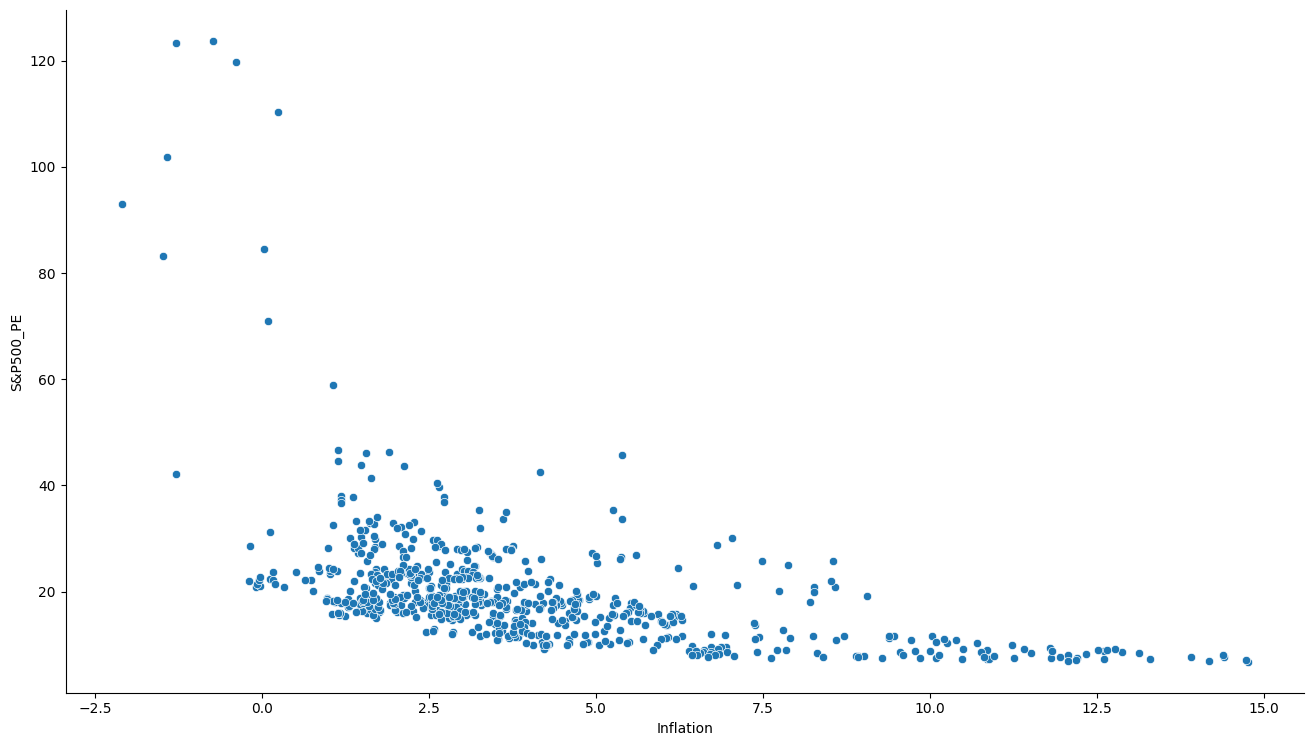

In [7]:
g = sns.relplot(x='Inflation', y='S&P500_PE', data=df)
g.fig.set_size_inches(15,8)

In [8]:
#Remove outliers in S&P 500

upper_limit = df['S&P500_PE'].mean()+3*df['S&P500_PE'].std()
lower_limit = df['S&P500_PE'].mean()-3*df['S&P500_PE'].std()

df = df[(df['S&P500_PE'] < upper_limit) & (df['S&P500_PE'] > lower_limit)]


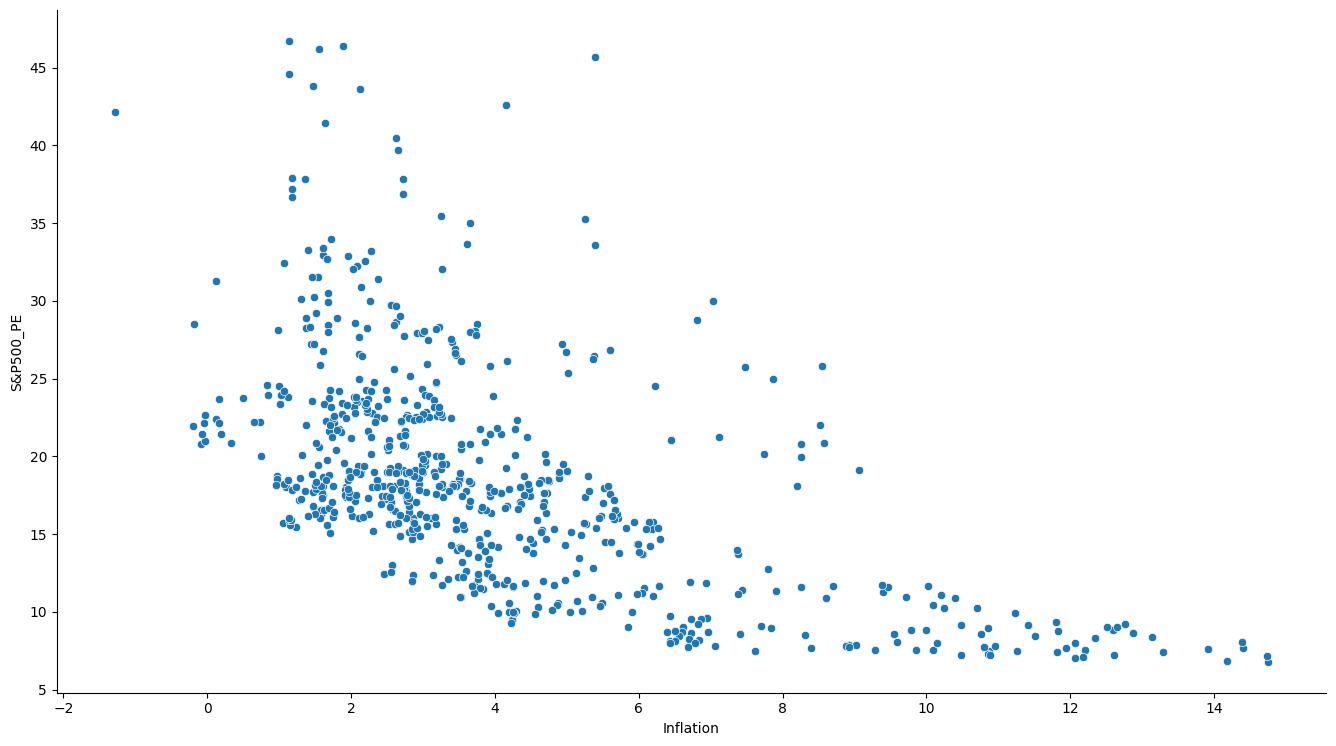

In [9]:

g = sns.relplot(x='Inflation', y='S&P500_PE', data=df)
g.fig.set_size_inches(15,8)

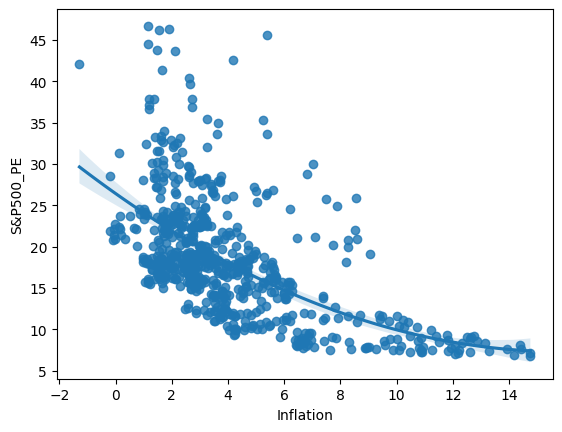

In [10]:
sns.regplot(x='Inflation', y='S&P500_PE', data=df, order = 2);

In [11]:
X = df['Inflation']
y = df['S&P500_PE']

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X.values.reshape(-1,1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)

In [ ]:
print(r2_score(y,y_predicted))

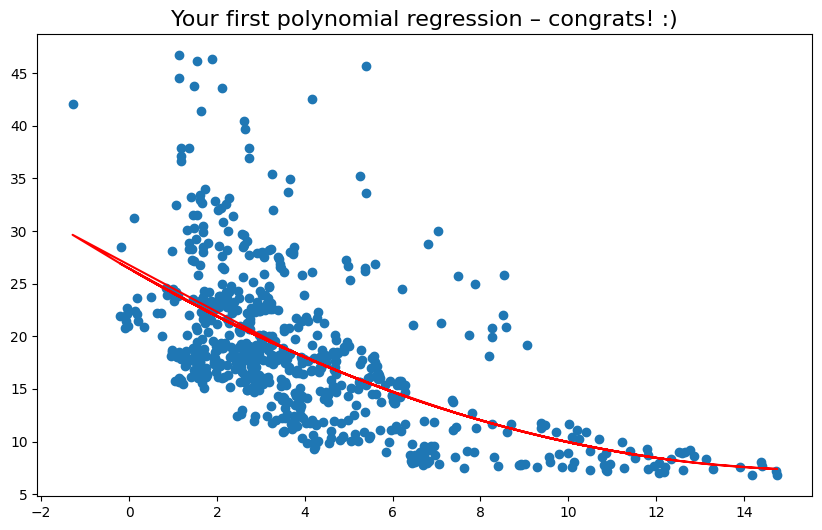

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, y_predicted, c="red")
plt.show()